In [88]:
# import libraries and load dataset
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

dataset = pd.read_csv('pokemon.csv')

dataset[['name', 'classfication', 'type1', 'type2', 'hp', 'attack', 'speed', 'abilities']]

,name,classfication,type1,type2,hp,abilities
0,Bulbasaur,Seed Pokémon,grass,poison,45,"['Overgrow', 'Chlorophyll']"
1,Ivysaur,Seed Pokémon,grass,poison,60,"['Overgrow', 'Chlorophyll']"
2,Venusaur,Seed Pokémon,grass,poison,80,"['Overgrow', 'Chlorophyll']"
3,Charmander,Lizard Pokémon,fire,NaN,39,"['Blaze', 'Solar Power']"
4,Charmeleon,Flame Pokémon,fire,NaN,58,"['Blaze', 'Solar Power']"
...,...,...,...,...,...,...
796,Celesteela,Launch Pokémon,steel,flying,97,['Beast Boost']
797,Kartana,Drawn Sword Pokémon,grass,steel,59,['Beast Boost']
798,Guzzlord,Junkivore Pokémon,dark,dragon,223,['Beast Boost']
799,Necrozma,Prism Pokémon,psychic,NaN,97,['Prism Armor']


In [98]:
# extract classification from dataset

classes = dataset['classfication'].unique()
classes = [c.split()[0] for c in classes]
print(classes)

['Seed', 'Lizard', 'Flame', 'Tiny', 'Turtle', 'Shellfish', 'Worm', 'Cocoon', 'Butterfly', 'Hairy', 'Poison', 'Tiny', 'Bird', 'Mouse', 'Beak', 'Snake', 'Cobra', 'Poison', 'Drill', 'Fairy', 'Fox', 'Balloon', 'Bat', 'Weed', 'Flower', 'Mushroom', 'Insect', 'Poison', 'Mole', 'Scratch', 'Classy', 'Duck', 'Pig', 'Puppy', 'Legendary', 'Tadpole', 'Psi', 'Superpower', 'Flycatcher', 'Jellyfish', 'Rock', 'Megaton', 'Fire', 'Dopey', 'Hermit', 'Magnet', 'Wild', 'Twin', 'Triple', 'Sea', 'Sludge', 'Bivalve', 'Gas', 'Shadow', 'Rock', 'Hypnosis', 'River', 'Pincer', 'Ball', 'Egg', 'Coconut', 'Lonely', 'Bone', 'Kicking', 'Punching', 'Licking', 'Poison', 'Spikes', 'Vine', 'Parent', 'Dragon', 'Goldfish', 'Starshape', 'Mysterious', 'Barrier', 'Mantis', 'Humanshape', 'Electric', 'Spitfire', 'Stagbeetle', 'Wild', 'Fish', 'Atrocious', 'Transport', 'Transform', 'Evolution', 'Bubble', 'Lightning', 'Virtual', 'Spiral', 'Fossil', 'Sleeping', 'Freeze', 'Genetic', 'New', 'Leaf', 'Herb', 'Fire', 'Volcano', 'Big', 'Sco

In [69]:
# pokemons for testing metrics

featured_pokemon_names = ('Pikachu', 'Guzzlord', 'Venusaur', 'Charmander', 'Necrozma')
featured_pokemons_count = len(featured_pokemon_names)

featured_pokemons = dataset.loc[dataset['name'].isin(featured_pokemon_names)]
featured_pokemons[['name', 'classfication', 'type1', 'type2', 'hp', 'attack', 'speed', 'abilities']]

,name,classfication,type1,type2,hp,attack,speed,abilities
2,Venusaur,Seed Pokémon,grass,poison,80,100,80,"['Overgrow', 'Chlorophyll']"
3,Charmander,Lizard Pokémon,fire,NaN,39,52,65,"['Blaze', 'Solar Power']"
24,Pikachu,Mouse Pokémon,electric,NaN,35,55,90,"['Static', 'Lightningrod']"
798,Guzzlord,Junkivore Pokémon,dark,dragon,223,101,43,['Beast Boost']
799,Necrozma,Prism Pokémon,psychic,NaN,97,107,79,['Prism Armor']


In [70]:
%matplotlib inline
from matplotlib import pyplot as plt

# creates similarity matrices from metric function
def create_similarity_matrix(metric):
    matrix = np.zeros((featured_pokemons_count, featured_pokemons_count))
    for i in range(featured_pokemons_count):
        for j in range(featured_pokemons_count):
            matrix[i, j] = metric(featured_pokemons.iloc[i], featured_pokemons.iloc[j])
    return matrix

def show_similarity_matrix(matrix):
    plt.imshow(matrix, interpolation='nearest')
    plt.show()

def show_metric(metric):
    show_similarity_matrix(create_similarity_matrix(metric))

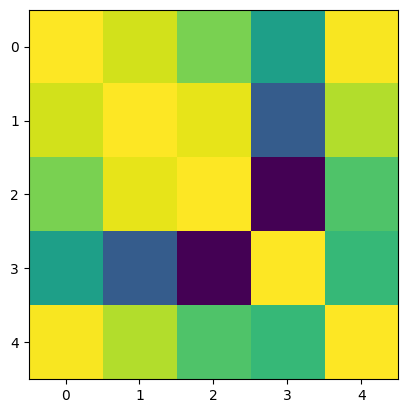

In [79]:
# simple metric (compare by hp, attack and speed)
def simple_metric_hp_attack_speed(row1: pd.DataFrame, row2: pd.DataFrame):
    params1 = row1[['hp', 'attack', 'speed']].values.reshape((1, -1))
    params2 = row2[['hp', 'attack', 'speed']].values.reshape((1, -1))
    return cosine_similarity(params1, params2)[0, 0]

show_metric(simple_metric_hp_attack_speed)

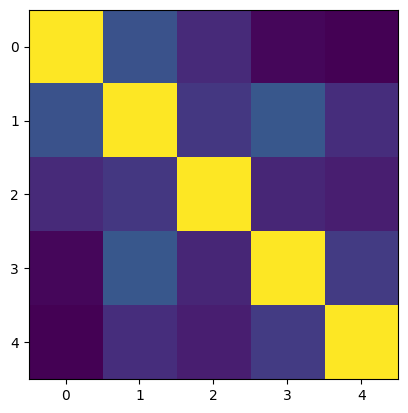

In [86]:
# simple associative metric (compare by abilities)
def simple_metric_abilities(row1: pd.DataFrame, row2: pd.DataFrame):
    params1 = set(row1['abilities'])
    params2 = set(row2['abilities'])
    union_len = len(params1.union(params2))
    inter_len = len(params1.intersection(params2))
    return inter_len / union_len

show_metric(simple_metric_abilities)